#**Assessing People’s Behaviour in Text Messages Using Natural Language Processing**


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords   # may need to download (see below)
from nltk.sentiment.vader import SentimentIntensityAnalyzer   # again, may need to download (see below)
%matplotlib inline 
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
with open('nlp_trial_3.txt') as f:
    content = f.readlines()

content = [x.strip() for x in content] 

In [ ]:
content[:5]

["22/07/2020, 5:02 PM - Person1: Ma'am this is Person1. Can you allot us a time after 6PM to explain our project title ?",
 '22/07/2020, 5:02 PM - Person1: review 1 basically!',
 '22/07/2020, 5:02 PM - Person1: Regards',
 '22/07/2020, 5:03 PM - Person2: I am in a  meeting. It continues till 6',
 "22/07/2020, 5:03 PM - Person1: so after 6  ma'am?"]


Formatting Data

Tokenizing

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
#Punkt Sentence Tokenizer

# This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

# The NLTK data package includes a pre-trained Punkt tokenizer for English.


However, Punkt is designed to learn parameters (a list of abbreviations, etc.) unsupervised from a corpus similar to the target domain. The pre-packaged models may therefore be unsuitable: use PunktSentenceTokenizer(text) to learn parameters from the given text.

nltk.tokenize.punkt.PunktTrainer learns parameters such as a list of abbreviations (without supervision) from portions of text. Using a PunktTrainer directly allows for incremental training and modification of the hyper-parameters used to decide what is considered an abbreviation, etc.

In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Examples
sid.polarity_scores('Good')



{'compound': 0.4404, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [ ]:
sid.polarity_scores('Not Good')


{'compound': -0.3412, 'neg': 0.706, 'neu': 0.294, 'pos': 0.0}

In [ ]:
sid.polarity_scores("Okayish")

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

 run-through and just plot the mean polarity of each days messages:

In [ ]:
pol_lst=[]
date_lst=[]
i=0

for line in content:
    
    try:
        text = nltk.sent_tokenize(line.split(':')[2].replace('\n',' '))
        #print(text)
        date = line.split(',')[0].split(',')[0]
        #print(date)
        for token in text:
            #print(token)
            ss = sid.polarity_scores(token)  
            pol_lst.append(ss['compound'])
            date_lst.append(date)
            
    except:
        
        print(i, line) # uncomment this to print the message that couldn't be read
        
        pass
    i+=1   # uncomment this to see the line number that the message fails to be read

In [ ]:
df = pd.DataFrame({'date' : date_lst, 'pol' : pol_lst})

In [ ]:
df

,date,pol
0,22/07/2020,0.000
1,22/07/2020,0.000
2,22/07/2020,0.000
3,22/07/2020,0.000
4,22/07/2020,0.000
...,...,...
103,24/12/2020,0.000
104,24/12/2020,-0.296
105,24/12/2020,0.000
106,24/12/2020,0.000


In [ ]:
df2 = df.groupby('date').mean()
print(df2)

                 pol
date                
01/09/2020 -0.098667
02/09/2020  0.000000
03/11/2020  0.074000
05/08/2020  0.190775
12/09/2020  0.370525
13/09/2020 -0.296000
14/10/2020  0.102125
17/09/2020 -0.148000
18/08/2020  0.067940
19/10/2020  0.098667
20/10/2020  0.025144
22/07/2020  0.074658
24/12/2020  0.040827
26/08/2020  0.185475
27/09/2020  0.180600
27/10/2020  0.036786
28/07/2020  0.165900
28/09/2020  0.133967


In [ ]:
df2.index = pd.to_datetime(df2.index, format='%d/%m/%Y')

In [ ]:
#df2.date=pd.to_datetime(df2.date)

In [ ]:
df2 = df2.sort_index()

In [ ]:
df2['date'] = df2.index

In [ ]:
df2

,pol,date
date,,
2020-09-01,-0.098667,01/09/2020
2020-09-02,0.000000,02/09/2020
2020-11-03,0.074000,03/11/2020
2020-08-05,0.190775,05/08/2020
2020-09-12,0.370525,12/09/2020
2020-09-13,-0.296000,13/09/2020
2020-10-14,0.102125,14/10/2020
2020-09-17,-0.148000,17/09/2020
2020-08-18,0.067940,18/08/2020


<Figure size 432x288 with 0 Axes>

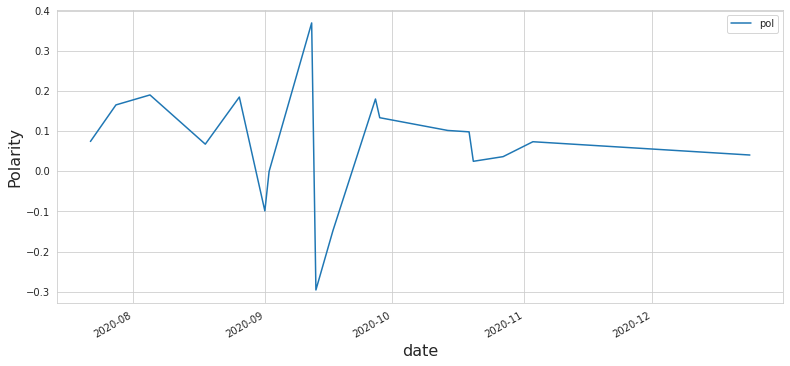

In [ ]:
sns.set_style("whitegrid")

plt.figure()
ax = df2.plot(figsize=(13,6), legend=True)

ax.set_ylabel('Polarity')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)


So that worked quite well and a general trend can be drawn from the plot. However, upon doing this, there were a few issues and points that could be improved:

the sentiment intensity analyzer doesn't work on emojis

the plot doesn't differentiate between both participants of the chat


splitting on ':' chracter removes further ':' characters in text which is not good for calculating a sentiment associated to e.g. a ': )' or ': (' face

In [ ]:
import emoji
test = content[15:25]
for line in test:
    for c in line:
        if c in emoji.UNICODE_EMOJI:
            print(c)
            #print(c)
            print(emoji.demojize(c).replace('_',' ').replace(':','.'))
            print(sid.polarity_scores(emoji.demojize(c).replace('_',' ').replace(':','.'))['compound'])

In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 4.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=33577945c76a33077860d43c06da215179e4ff6b3c1165de61c9d1c6a2a89de2
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
#Indivual Dataset
final = defaultdict(list)
i=1 # used as final dictioanry key

for line in content:
        
        try:
            date = line.split('[')[0].split(',')[0] # strip just the date
            
            person = line.split(':')[1][7:]  # strip the persons name
            text = ':'.join(line.split(':')[2:])  # strip just the text
            # joins back on the ':' -> useful for smiley face ':)'
            # which has sentiment associated
            #print(date,text)
            # convert emojis to their Unicode description ...works well with sentiment
            # loop through each character to check if it's an emoji, then convert
            #print(text)
            # for c in text:
            #     if c in emoji.UNICODE_EMOJI:
            #         text = text.replace(c, emoji.demojize(c).replace('_',' ').replace(':','.'))
            
            # tokenize the sentence, i.e. split up into chunks based on punctuation.
            #print(text)   
            sentence = nltk.sent_tokenize(text)
            num = np.array([])
            
            for token in sentence:
                # calculate sentiment of token and add to the final dictionary 
                # along with person and date metrics
                ss = sid.polarity_scores(token)
                #print(token)
                final[i] = [ss['compound'], person, date, token]
                #print(final[i])
                i+=1
                
        except:
            pass

In [ ]:
df= pd.DataFrame(final).T

In [ ]:
#df
#TESTING DATA
#a1="22/07/2020, 5:02 PM - Person1: review 1 basically!"

In [ ]:
#date = a1.split('[')[0].split(',')[0] # strip just the date
#person = a1.split(':')[1][7:]  # strip the persons name
#text = ':'.join(a1.split(':')[2:])
#print(date)
#print(person)
#print(text)

 review 1 basically!


In [ ]:
df.columns = ['pol', 'name', 'date', 'token']


In [ ]:
print(df)

       pol  ...                                              token
1        0  ...                             Ma'am this is Person1.
2        0  ...  Can you allot us a time after 6PM to explain o...
3        0  ...                                review 1 basically!
4        0  ...                                            Regards
5        0  ...                                I am in a  meeting.
..     ...  ...                                                ...
104      0  ...                                half an hour needed
105 -0.296  ...                                         no issues.
106      0  ...                                take time and do it
107      0  ...                         ma'am I have sent the mail
108  0.296  ...                                                 ok

[108 rows x 4 columns]


In [ ]:
#Example for most -ve Message
df[['pol','token', 'name']].sort_values('pol')[:1]
#len(df)
#df.dtypes


,pol,token,name
83,-0.4404,it says access denied,Person1


In [ ]:
df['pol'] = df['pol'].apply(lambda x : float(x))

Calculate the mean sentiment of all messages for each person, each day

In [ ]:
df2 = df.groupby(['date', 'name'], as_index=False).agg('mean')

In [ ]:
df2[:6]

,date,name,pol
0,01/09/2020,Person1,0.0000
1,01/09/2020,Person2,-0.2960
2,02/09/2020,Person1,0.0000
3,03/11/2020,Person1,0.0000
4,03/11/2020,Person2,0.2960
5,05/08/2020,Person1,0.1204


Create a 'combined' dataset, based on the mean polarity of both people in the chat:
Similar to above, just dont need to group-by name as well

In [ ]:
df3 = df.groupby(['date'], as_index=False).agg('mean')

In [ ]:
df3['name'] = 'Combined'

Join 'combined' onto 'original':

In [ ]:
final =pd.concat([df2, df3])
final['date'] = pd.to_datetime(final.date, format='%d/%m/%Y') # need to chnage 'date' to a datetime object
final = final.sort_values('date')
final[:6]

,date,name,pol
20,2020-07-22,Person2,0.000000
19,2020-07-22,Person1,0.127986
11,2020-07-22,Combined,0.074658
29,2020-07-28,Person1,0.168460
16,2020-07-28,Combined,0.165900
30,2020-07-28,Person2,0.153100


create a numerical column that maps to the date. Makes splotting more straightforward, as some of the below plots don't like having an x-axis of type datetime...
An easy way to do this is via a dense rank:

In [ ]:
final['x'] = final['date'].rank(method='dense', ascending=True).astype(int)


In [ ]:
final[:4]

,date,name,pol,x
20,2020-07-22,Person2,0.000000,1
19,2020-07-22,Person1,0.127986,1
11,2020-07-22,Combined,0.074658,1
29,2020-07-28,Person1,0.168460,2


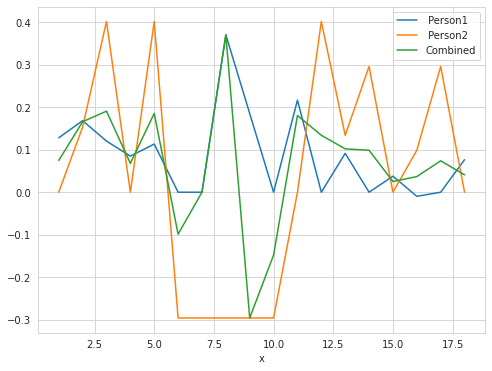

In [ ]:
#plotting polarity for each person (and combined) against time:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,6))

for label, df in final.groupby('name'):
    df.plot(x='x', y='pol', ax=ax, label=label)
    
plt.legend()

In our above example we are also able to see a significant difference , but in general it's really quite difficult to view any significant differences between the two people. To smooth out the data a bit (which will have the effect of normalising any local high and low points)

**With Rolling Mean:**

Text(0.5, 1.0, '4 Day Rolling Mean Sentiment')

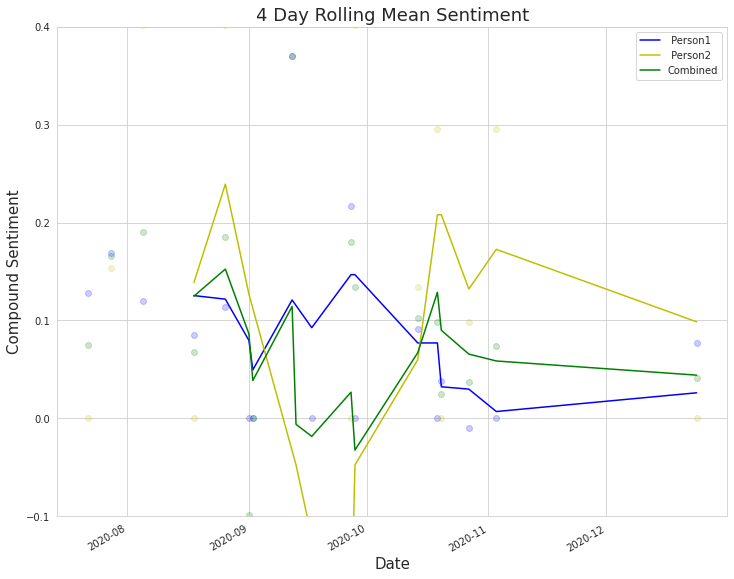

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,10))
colours=['b','y','g']
i=0

for label, df in final.groupby('name'):
    
    new=df.reset_index()
    new['rol'] = new['pol'].rolling(4).mean() # rolling mean calculation on a 4 day basis
    
    g = new.plot(x='date', y='rol', ax=ax, label=label, color=colours[i]) # rolling mean plot
    plt.scatter(df['date'].tolist(), df['pol'], color=colours[i], alpha=0.2) # underlying scatter plot
    
    i+=1

ax.set_ybound(lower=-0.1, upper=0.4)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Compound Sentiment', fontsize=15)

g.set_title('4 Day Rolling Mean Sentiment', fontsize=18)

#plt.savefig('plots/sentiment_time')   # uncomment to save

Classifying Dialogue using Naive Bayes , POS Tagging , Lexical Diversity


In [ ]:
ppl=defaultdict(list)

for line in content:
    
    try:
        # date = line.split('[')[1].split(',')[0]
        person = line.split(':')[1][7:]
        text = nltk.sent_tokenize(':'.join(line.split(':')[2:]))
      
        ppl[person].extend(text)   # If key exists: extend (value) list, if not create a new key with text extended to list
           
    except:
        #print('Error!')
        #print(line)   # uncomment to examine failed line
        
        pass


Dictionary -> Key is the person who sent the message, the value is a sentence-tokenized list of all the messages they've sent.

In [ ]:
print(ppl)

defaultdict(<class 'list'>, {' Person1': [" Ma'am this is Person1.", 'Can you allot us a time after 6PM to explain our project title ?', ' review 1 basically!', ' Regards', " so after 6  ma'am?", " Yes Ma'am , Thank You !", " okay ma'am", " Ma'am , are we allowed to run a ppt with pictures or cartoons and give our voiceover in the background", ' instead of animation ?', ' with transitions', " yes ma'am", ' thanks', " ma'am is this the animation?", ' regards', ' thank you', " Ma'am for DA-2 can we have 7 people in our group", " we can't divide as 4 and 3 people and we are not Able to find a group for that one extra person", ' so can we have 7 people ?', " sure ma'am", ' thank you', " and ma'am can we take additional one /two minutes", ' for that extra person?', ' 11/12 min', ' the list that you shared', ' my name is there and my teammates name is not', ' so anyways can be together and finish it in todays class', " ma'am some people in this completed because", ' the other team member was

In [ ]:
#<ADd EMOJI>

Categorise Messages With A Naive Bayes Classifier



```
`# This is formatted as code`
```

Use the nltk nps_chat data to train a naive bayes model.

Each message in the dataset has already been classified into 1 of 15 categories:

'Greet', 'Statement', 'Emphasis', 'Clarify', 'why Question', 'yes no Question',' Reject', 'no Answer', 'yes Answer', 'Other', 'Bye', 'Emotion', 'System', 'Accept', 'Continuer'

In [ ]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.


True

In [ ]:
posts = nltk.corpus.nps_chat.xml_posts()

In [ ]:
#Extract features from each message, tokenize by word
def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

In [ ]:
fposts = [(extract_features(p.text), p.get('class')) for p in posts]

In [ ]:
#create a train and test set of the chat messages
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]

In [ ]:
#train the model
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [ ]:
#Test accuracy against the test set of data
print(nltk.classify.accuracy(classifier, test_set)*100,"%")

66.85606060606061 %


Some mini tests..

In [ ]:
classifier.classify(extract_features('Hi there!'))


'Greet'

In [ ]:
classifier.classify(extract_features('Do you want to watch a film later?'))

'ynQuestion'

In [ ]:
classifier.classify(extract_features('No Issues'))

'nAnswer'

In [ ]:
ppl_cat= {}
print("Types of messages sent by each member of the chat,"
      " as classified by a Naive Bayes Classifier trained on the nltk nps_chat dataset \n***\n")
for key, val in ppl.items():
    cat=[]
    for sent in val:
        cat.append(classifier.classify(extract_features(sent)))
        count = Counter(cat)
    ppl_cat[key] = count
    print("{}: {} \n\n".format(key, count.most_common()))

Types of messages sent by each member of the chat, as classified by a Naive Bayes Classifier trained on the nltk nps_chat dataset 
***

 Person1: [('Statement', 34), ('ynQuestion', 13), ('whQuestion', 8), ('Clarify', 7), ('yAnswer', 4), ('Emphasis', 3), ('Reject', 3), ('nAnswer', 2), ('Continuer', 1)] 


 Person2: [('Statement', 19), ('yAnswer', 5), ('nAnswer', 3), ('Reject', 2), ('Accept', 1), ('Bye', 1), ('Emphasis', 1), ('System', 1)] 




In [ ]:
df = pd.DataFrame.from_dict(ppl_cat, orient='index')

In [ ]:
df

In [ ]:
#since each person has sent a different number of messages, normalize these counts
df = df.div(df.sum(axis=1), axis=0).round(3)

In [ ]:
df

,Statement,Clarify,Emphasis,whQuestion,ynQuestion,yAnswer,Reject,nAnswer,Continuer,Accept,Bye,System
Person1,0.453,0.093,0.04,0.107,0.173,0.053,0.040,0.027,0.013,NaN,NaN,NaN
Person2,0.576,NaN,0.03,NaN,NaN,0.152,0.061,0.091,NaN,0.03,0.03,0.03


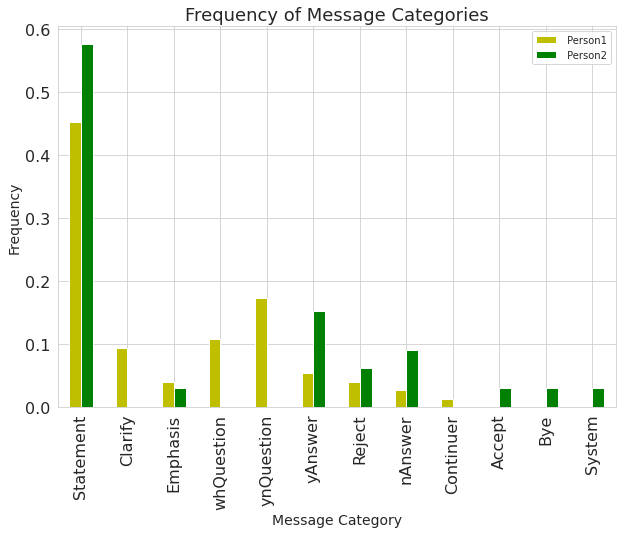

In [ ]:
ax = df.T.plot(kind='bar', figsize=(10, 7), legend=True,
               fontsize=16, color=['y','g'])

ax.set_title("Frequency of Message Categories", fontsize= 18)
ax.set_xlabel("Message Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

#plt.savefig('plots/cat_message')   # uncomment to save
plt.show()


**Wordcloud**

**convert list to string and split individual words on a space -> list of individual words**

In [ ]:
p1s = ''.join(ppl[' Person1']).split()
p2s = ' '.join(ppl[' Person2']).split()

In [ ]:
p2s[:5]

['I', 'am', 'in', 'a', 'meeting.']

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#stopwords.append('<‎image omitted>')  # doesn't work

To plot Person_2's wordcloud:

In [ ]:
filtered_words = [word for word in p2s if word not in stopwords]

In [ ]:
filtered_words[:5]

['I', 'meeting.', 'It', 'continues', 'till']

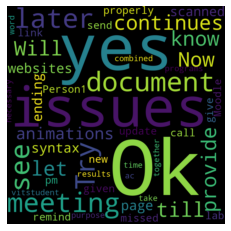

In [ ]:
p1sf = ' '.join(filtered_words)
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(p1sf)
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.margins(x=0, y=0)

# plt.savefig('plots/wordcloud')

**Lexical Diversity**
i.e. how many different words a person uses/ how big a persons vocabulary is (or at least choose to use)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
def lexical_diversity(text):
    
    return len(set(text)) / len(text)

for key, value in ppl.items():
    wrds=[]
    
    for line in ppl[key]:       
        words = nltk.word_tokenize(line)
        wrds.extend(words)
        
    tagged = nltk.pos_tag(wrds, tagset='universal' )
    print("{}'s lexical diversity: {} \n".format(key, lexical_diversity(tagged)))

 Person1's lexical diversity: 0.503921568627451 

 Person2's lexical diversity: 0.7741935483870968 



POS tagging

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
wrds=[]
for line1 in ppl[' Person1']:
    words = nltk.word_tokenize(line1)
    wrds.extend(words)
tagged = nltk.tag.pos_tag(wrds, tagset='universal')
tggd = nltk.FreqDist(tag for (word, tag) in tagged)

In [ ]:
tggd

FreqDist({'.': 36,
          'ADJ': 26,
          'ADP': 46,
          'ADV': 29,
          'CONJ': 14,
          'DET': 30,
          'NOUN': 128,
          'NUM': 23,
          'PRON': 59,
          'PRT': 10,
          'VERB': 107,
          'X': 2})

In [ ]:
counts = Counter(stemmer.stem(word) for word, tag in tagged if tag == 'VERB' )


In [ ]:
counts.most_common()[:3]

[('is', 12), ('can', 9), ('have', 7)]

Frequency of messages by time of day each month

In [ ]:
dates=[]
for line in content:
    try:
        dates.append(line.split('-')[0])
        #print(dates)
        #print(line.split(',')[0])
    except:
        #print(line)   # examine the line that can't be read
        #print('oops')
        pass
print(dates)

['22/07/2020, 5:02 PM ', '22/07/2020, 5:02 PM ', '22/07/2020, 5:02 PM ', '22/07/2020, 5:03 PM ', '22/07/2020, 5:03 PM ', '22/07/2020, 5:04 PM ', '22/07/2020, 5:04 PM ', '22/07/2020, 7:03 PM ', '22/07/2020, 7:04 PM ', '22/07/2020, 7:04 PM ', '28/07/2020, 6:32 PM ', '28/07/2020, 6:32 PM ', '28/07/2020, 6:32 PM ', '28/07/2020, 6:46 PM ', '28/07/2020, 6:46 PM ', '28/07/2020, 6:46 PM ', '05/08/2020, 4:13 PM ', '05/08/2020, 4:13 PM ', '05/08/2020, 4:13 PM ', '05/08/2020, 4:14 PM ', '18/08/2020, 5:43 PM ', '18/08/2020, 5:44 PM ', '18/08/2020, 5:44 PM ', '18/08/2020, 5:49 PM ', '18/08/2020, 5:50 PM ', '18/08/2020, 5:50 PM ', '18/08/2020, 5:50 PM ', '18/08/2020, 5:50 PM ', '18/08/2020, 5:50 PM ', '18/08/2020, 5:54 PM ', '26/08/2020, 9:35 AM ', '26/08/2020, 9:35 AM ', '26/08/2020, 9:36 AM ', '26/08/2020, 10:03 AM ', '01/09/2020, 8:17 PM ', '01/09/2020, 8:17 PM ', '01/09/2020, 8:17 PM ', '02/09/2020, 3:48 PM ', '02/09/2020, 3:48 PM ', '02/09/2020, 3:49 PM ', '12/09/2020, 10:17 PM ', '12/09/2020, 

In [ ]:
date=[]
time=[]
for item in dates:
    date.append(item.split(',')[0])
    time.append((item.split(',')[1]))

In [ ]:
dates[:3]


['22/07/2020, 5:02 PM ', '22/07/2020, 5:02 PM ', '22/07/2020, 5:02 PM ']

In [ ]:
df = pd.DataFrame(dates, columns =['dtm'])

In [ ]:
df[:5]

,dtm
0,"22/07/2020, 5:02 PM"
1,"22/07/2020, 5:02 PM"
2,"22/07/2020, 5:02 PM"
3,"22/07/2020, 5:03 PM"
4,"22/07/2020, 5:03 PM"


In [ ]:
#document-term matrix
#Convert argument to datetime
df.dtm = pd.to_datetime(df.dtm)


In [ ]:
df

,dtm,float_time,year_month,day,day_num
67,2020-10-19 15:06:00,15.100000,2020-10,Monday,0
68,2020-10-19 15:06:00,15.100000,2020-10,Monday,0
52,2020-09-28 15:35:00,15.583333,2020-09,Monday,0
53,2020-09-28 15:35:00,15.583333,2020-09,Monday,0
54,2020-09-28 15:36:00,15.600000,2020-09,Monday,0
...,...,...,...,...,...
47,2020-09-27 21:23:00,21.383333,2020-09,Sunday,6
48,2020-09-27 21:23:00,21.383333,2020-09,Sunday,6
49,2020-09-27 21:51:00,21.850000,2020-09,Sunday,6
37,2020-02-09 15:48:00,15.800000,2020-02,Sunday,6


In [ ]:
df['float_time'] = df.dtm.dt.hour+df.dtm.dt.minute/60.0

In [ ]:
df['year_month'] = df.dtm.dt.to_period('M')

In [ ]:
df['day'] = df.dtm.dt.day_name()

In [ ]:
df['day_num'] = df.dtm.dt.dayofweek


In [ ]:
df = df.sort_values('day_num')   # change this to 'year_month' if wanting to plot by this instead


In [ ]:
df['freq'] = df.groupby('day')['day'].transform('count')


In [ ]:
df[:40]

,dtm,float_time,year_month,day,day_num,freq
67,2020-10-19 15:06:00,15.100000,2020-10,Monday,0,6
68,2020-10-19 15:06:00,15.100000,2020-10,Monday,0,6
52,2020-09-28 15:35:00,15.583333,2020-09,Monday,0,6
53,2020-09-28 15:35:00,15.583333,2020-09,Monday,0,6
54,2020-09-28 15:36:00,15.600000,2020-09,Monday,0,6
69,2020-10-19 15:57:00,15.950000,2020-10,Monday,0,6
79,2020-10-27 14:54:00,14.900000,2020-10,Tuesday,1,32
23,2020-08-18 17:49:00,17.816667,2020-08,Tuesday,1,32
83,2020-10-27 14:57:00,14.950000,2020-10,Tuesday,1,32
25,2020-08-18 17:50:00,17.833333,2020-08,Tuesday,1,32


In [ ]:
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
days_freq = list(df.day.value_counts().index)

In [ ]:
days_freq


['Wednesday', 'Tuesday', 'Thursday', 'Sunday', 'Monday', 'Friday']

In [ ]:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#This is essentially the current order of colours
lst = list(zip(days, pal[::-1]))
lst 

[('Monday', [0.12071162840208301, 0.14526386650440642, 0.2463679091477368]),
 ('Tuesday', [0.18152581198633005, 0.24364059111738742, 0.37281834227732574]),
 ('Wednesday', [0.2426591079772084, 0.3511228226876375, 0.4852103253459974]),
 ('Thursday', [0.30463866738797124, 0.45571986933681846, 0.5751187147066701]),
 ('Friday', [0.3781016811140187, 0.5633546614344814, 0.6530658354036274]),
 ('Saturday', [0.46091631066717925, 0.662287611911293, 0.7165315069314769]),
 ('Sunday', [0.5632111255041908, 0.758620966612444, 0.7764634182455044])]

In [ ]:
pal_reorder=[]

for i in days:
    #print(i)
    j=0
    for day in days_freq:
        
        if i == day:
            #print(lst[j][1])
            pal_reorder.append(lst[j][1])
        j+=1

In [ ]:
pal_reorder

[[0.3781016811140187, 0.5633546614344814, 0.6530658354036274],
 [0.18152581198633005, 0.24364059111738742, 0.37281834227732574],
 [0.12071162840208301, 0.14526386650440642, 0.2463679091477368],
 [0.2426591079772084, 0.3511228226876375, 0.4852103253459974],
 [0.46091631066717925, 0.662287611911293, 0.7165315069314769],
 [0.30463866738797124, 0.45571986933681846, 0.5751187147066701]]

In [ ]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df[(df.float_time > 8)], row="day", hue="day", aspect=10, size=1.5, palette=pal_reorder, xlim=(7,24))

# Draw the densities in a few steps
g.map(sns.kdeplot, "float_time", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "float_time", clip_on=False, color="w", lw=3, bw=.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.1, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes, size=18)

g.map(label, "float_time")
g.set_xlabels('Time of Day', fontsize=30)
g.set_xticklabels(fontsize=20)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.5)
g.fig.suptitle('Message Density by Time and Day of the Week, Shaded by Total Message Count', fontsize=22)   
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

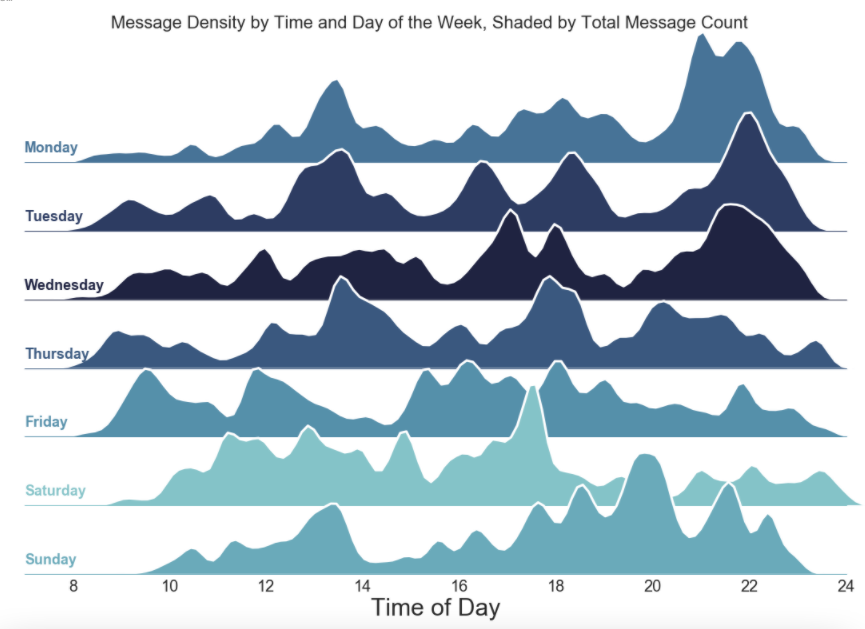